**Current Situation** 
Predicting the house price in the current economic market has no real/accurate measures. House price is often driven by the brokers taking in liu the unawareness of customers giving them a huge advantage, fooling/cheating the said customer. If only there was a way that could take into consideration all the factors that make the house price and setting this as a standard everywhere around the country/ world would help customers not being cheated on providing them with more transparency. 
The present method is that the customer approaches a real estate agent to manage his/her investments and suggest suitable estates for his investments. But this method is risky as the agent might predict wrong estates and thus leading to loss of the customer’s investments.
Generally, the property values rise with respect to time and its appraised value need to be calculated. This appraised value is required during the sale of property or while applying for the loan and for the marketability of the property. These appraised values are determined by the professional appraisers. However, drawback of this practice is that these appraisers could be biased due to bestowed interests from buyers, sellers or mortgages. Thus, we require an automated prediction model that can help to predict the property values without any bias. This automated model can help the first time, buyers and less experienced customers to understand whether the property rates are overrated or underrated

**Opportunity for improvement:**
The land prices are predicted with a new set of parameters with a different technique. Also we predicted the compensation for the settlement of the property. Mathematical relationships help us to understand many aspects of everyday life. When such relationships are expressed with exact numbers, we gain additional clarity Regression is concerned with specifying the relationship between a single numeric dependent variable and one or more numeric independent variables. House prices increase every year, so there is a need for a system to predict house prices in the future. House price prediction can help the developer determine the selling price of a house and can help the customer to arrange the right time to purchase a house. 
Machine learning tools and algorithms can become a great tool in solving the issue. We can take advantage of all the available features and use it to analyse and predict house prices. We can benefit both client house buyer and client house seller. 

**Data Requirement:**
We need a huge database of previously sold houses along with the prices that they were sold in and the various features related to the house.
Source of data and challenges:
Data can be acquired from a lot of sources like the websites that rent or sell houses such Magic bricks, makaan.com, 99acres.com,  and Kaggle. Some companies even have their Facebook pages mentioning the details of the house and prices. We can also refer to government repositories. However these data might not be clean and organised. Therefore it might need a lot of pre-processing.

**Size of the data:** 
Size of the data that we need is at least 1000 data points. We expect a house price on all of these. Since the data can come various formats such as MS Word, PPT, Paper etc. we need sufficient storage space and computation requirements to pre-process the data and bring it to a consistent state before modelling.


# Importing packages

In [470]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor, BaggingRegressor
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from scipy import stats
from sklearn.datasets import make_regression
from sklearn.model_selection import KFold, cross_val_score,train_test_split
from sklearn.utils import resample
import warnings
from pprint import pprint
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from random import choice
from sklearn.metrics import roc_auc_score
import pickle
warnings.filterwarnings('ignore')

In [471]:
df = pd.read_csv('innercity.csv')

In [472]:
df.head(5)

cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3034200666  20141107T000000  808100         4       3.25            3020   
1  8731981640  20141204T000000  277500         4       2.50            2550   
2  5104530220  20150420T000000  404000         3       2.50            2370   
3  6145600285  20140529T000000  300000         2       1.00             820   
4  8924100111  20150424T000000  699000         2       1.50            1400   

   lot_measure  ceil  coast  sight  ...  basement  yr_built  yr_renovated  \
0        13457   1.0      0      0  ...         0      1956             0   
1         7500   1.0      0      0  ...       800      1976             0   
2         4324   2.0      0      0  ...         0      2006             0   
3         3844   1.0      0      0  ...         0      1916             0   
4         4050   1.0      0      0  ...         0      1954             0   

   zipcode      lat     long  living_measure15  lot_measure15  furnished  \
0    98133  47.7174 -122.336              2120           7553          1   
1    98023  47.3165 -122.386              2260           8800          0   
2    98038  47.3515 -121.999              2370           4348          0   
3    98133  47.7049 -122.349              1520           3844          0   
4    98115  47.6768 -122.269              1900           5940          0   

   total_area  
0       16477  
1       10050  
2        6694  
3        4664  
4        5450  

[5 rows x 23 columns]

In [473]:
df.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

# EDA and Pre-Processing

In [474]:
df.describe(include='all').T

count unique              top freq        mean          std  \
cid               21613    NaN              NaN  NaN  4.5803e+09  2.87657e+09   
dayhours          21613    372  20140623T000000  142         NaN          NaN   
price             21613    NaN              NaN  NaN      540182       367362   
room_bed          21613    NaN              NaN  NaN     3.37084     0.930062   
room_bath         21613    NaN              NaN  NaN     2.11476     0.770163   
living_measure    21613    NaN              NaN  NaN      2079.9      918.441   
lot_measure       21613    NaN              NaN  NaN       15107      41420.5   
ceil              21613    NaN              NaN  NaN     1.49431     0.539989   
coast             21613    NaN              NaN  NaN  0.00754176    0.0865172   
sight             21613    NaN              NaN  NaN    0.234303     0.766318   
condition         21613    NaN              NaN  NaN     3.40943     0.650743   
quality           21613    NaN              NaN  NaN     7.65687      1.17546   
ceil_measure      21613    NaN              NaN  NaN     1788.39      828.091   
basement          21613    NaN              NaN  NaN     291.509      442.575   
yr_built          21613    NaN              NaN  NaN     1971.01      29.3734   
yr_renovated      21613    NaN              NaN  NaN     84.4023      401.679   
zipcode           21613    NaN              NaN  NaN     98077.9       53.505   
lat               21613    NaN              NaN  NaN     47.5601     0.138564   
long              21613    NaN              NaN  NaN    -122.214     0.140828   
living_measure15  21613    NaN              NaN  NaN     1986.55      685.391   
lot_measure15     21613    NaN              NaN  NaN     12768.5      27304.2   
furnished         21613    NaN              NaN  NaN    0.196687     0.397503   
total_area        21613    NaN              NaN  NaN     17186.9      41589.1   

                         min          25%          50%         75%  \
cid               1.0001e+06  2.12305e+09  3.90493e+09  7.3089e+09   
dayhours                 NaN          NaN          NaN         NaN   
price                  75000       321950       450000      645000   
room_bed                   0            3            3           4   
room_bath                  0         1.75         2.25         2.5   
living_measure           290         1427         1910        2550   
lot_measure              520         5040         7618       10688   
ceil                       1            1          1.5           2   
coast                      0            0            0           0   
sight                      0            0            0           0   
condition                  1            3            3           4   
quality                    1            7            7           8   
ceil_measure             290         1190         1560        2210   
basement                   0            0            0         560   
yr_built                1900         1951         1975        1997   
yr_renovated               0            0            0           0   
zipcode                98001        98033        98065       98118   
lat                  47.1559       47.471      47.5718      47.678   
long                -122.519     -122.328      -122.23    -122.125   
living_measure15         399         1490         1840        2360   
lot_measure15            651         5100         7620       10083   
furnished                  0            0            0           0   
total_area              1423         7035         9575       13000   

                          max  
cid                   9.9e+09  
dayhours                  NaN  
price                 7.7e+06  
room_bed                   33  
room_bath                   8  
living_measure          13540  
lot_measure       1.65136e+06  
ceil                      3.5  
coast                       1  
sight                       4  
condition                   5  
quality 

In [475]:
df.shape

(21613, 23)

In [476]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
cid                 21613 non-null int64
dayhours            21613 non-null object
price               21613 non-null int64
room_bed            21613 non-null int64
room_bath           21613 non-null float64
living_measure      21613 non-null int64
lot_measure         21613 non-null int64
ceil                21613 non-null float64
coast               21613 non-null int64
sight               21613 non-null int64
condition           21613 non-null int64
quality             21613 non-null int64
ceil_measure        21613 non-null int64
basement            21613 non-null int64
yr_built            21613 non-null int64
yr_renovated        21613 non-null int64
zipcode             21613 non-null int64
lat                 21613 non-null float64
long                21613 non-null float64
living_measure15    21613 non-null int64
lot_measure15       21613 non-null int64
furnished           2

In [477]:
df.isnull().sum()

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

#### Observation 1 - Dataset shape
Dataset has 21613 rows and 23 columns, with no missing values.

In [478]:
df['price'].describe()

count    2.161300e+04
mean     5.401822e+05
std      3.673622e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Skewness: 4.021716
Kurtosis: 34.522444


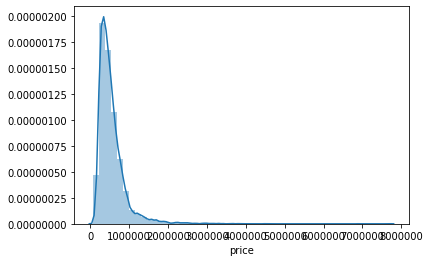

In [479]:
#histogram
sns.distplot(df['price'])
#skewness and kurtosis
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

In [480]:
#from dayhours column , extracting the year in which the house was sold. Making this a categorical column with 2 values in 2 categories
df['dayhours'] = df['dayhours'].str[:4]
print(df['dayhours'].unique())

['2014' '2015']


In [481]:
df['dayhours'].dtype

dtype('O')

In [482]:
df.dayhours = df.dayhours.astype('int64')

In [483]:
df["age_of_house"] =  df["dayhours"]- df["yr_built"]

In [484]:
#dropping cid column as it gives no relevent insights
df  = df.drop(columns=['yr_built','dayhours','cid'], axis = 1)

In [485]:
print(df['age_of_house'])

0        58
1        38
2         9
3        98
4        61
         ..
21608     8
21609    11
21610     0
21611    29
21612    66
Name: age_of_house, Length: 21613, dtype: int64


In [486]:
df['zipcode'].nunique()

70

Text(0.5, 1, 'Correlation Matrix of Data')

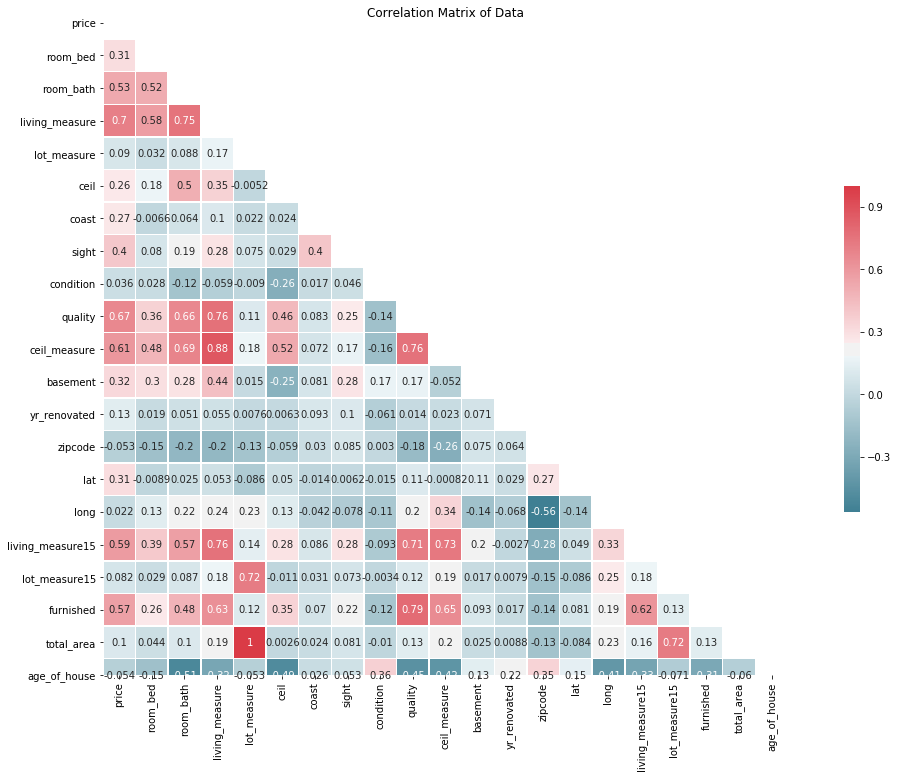

In [487]:
# Correlation matrix for all variables
corr = df.corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (20, 12))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap, square = True, linewidths = .5, cbar_kws = {"shrink": .5}, annot = True)
ax.set_title('Correlation Matrix of Data')

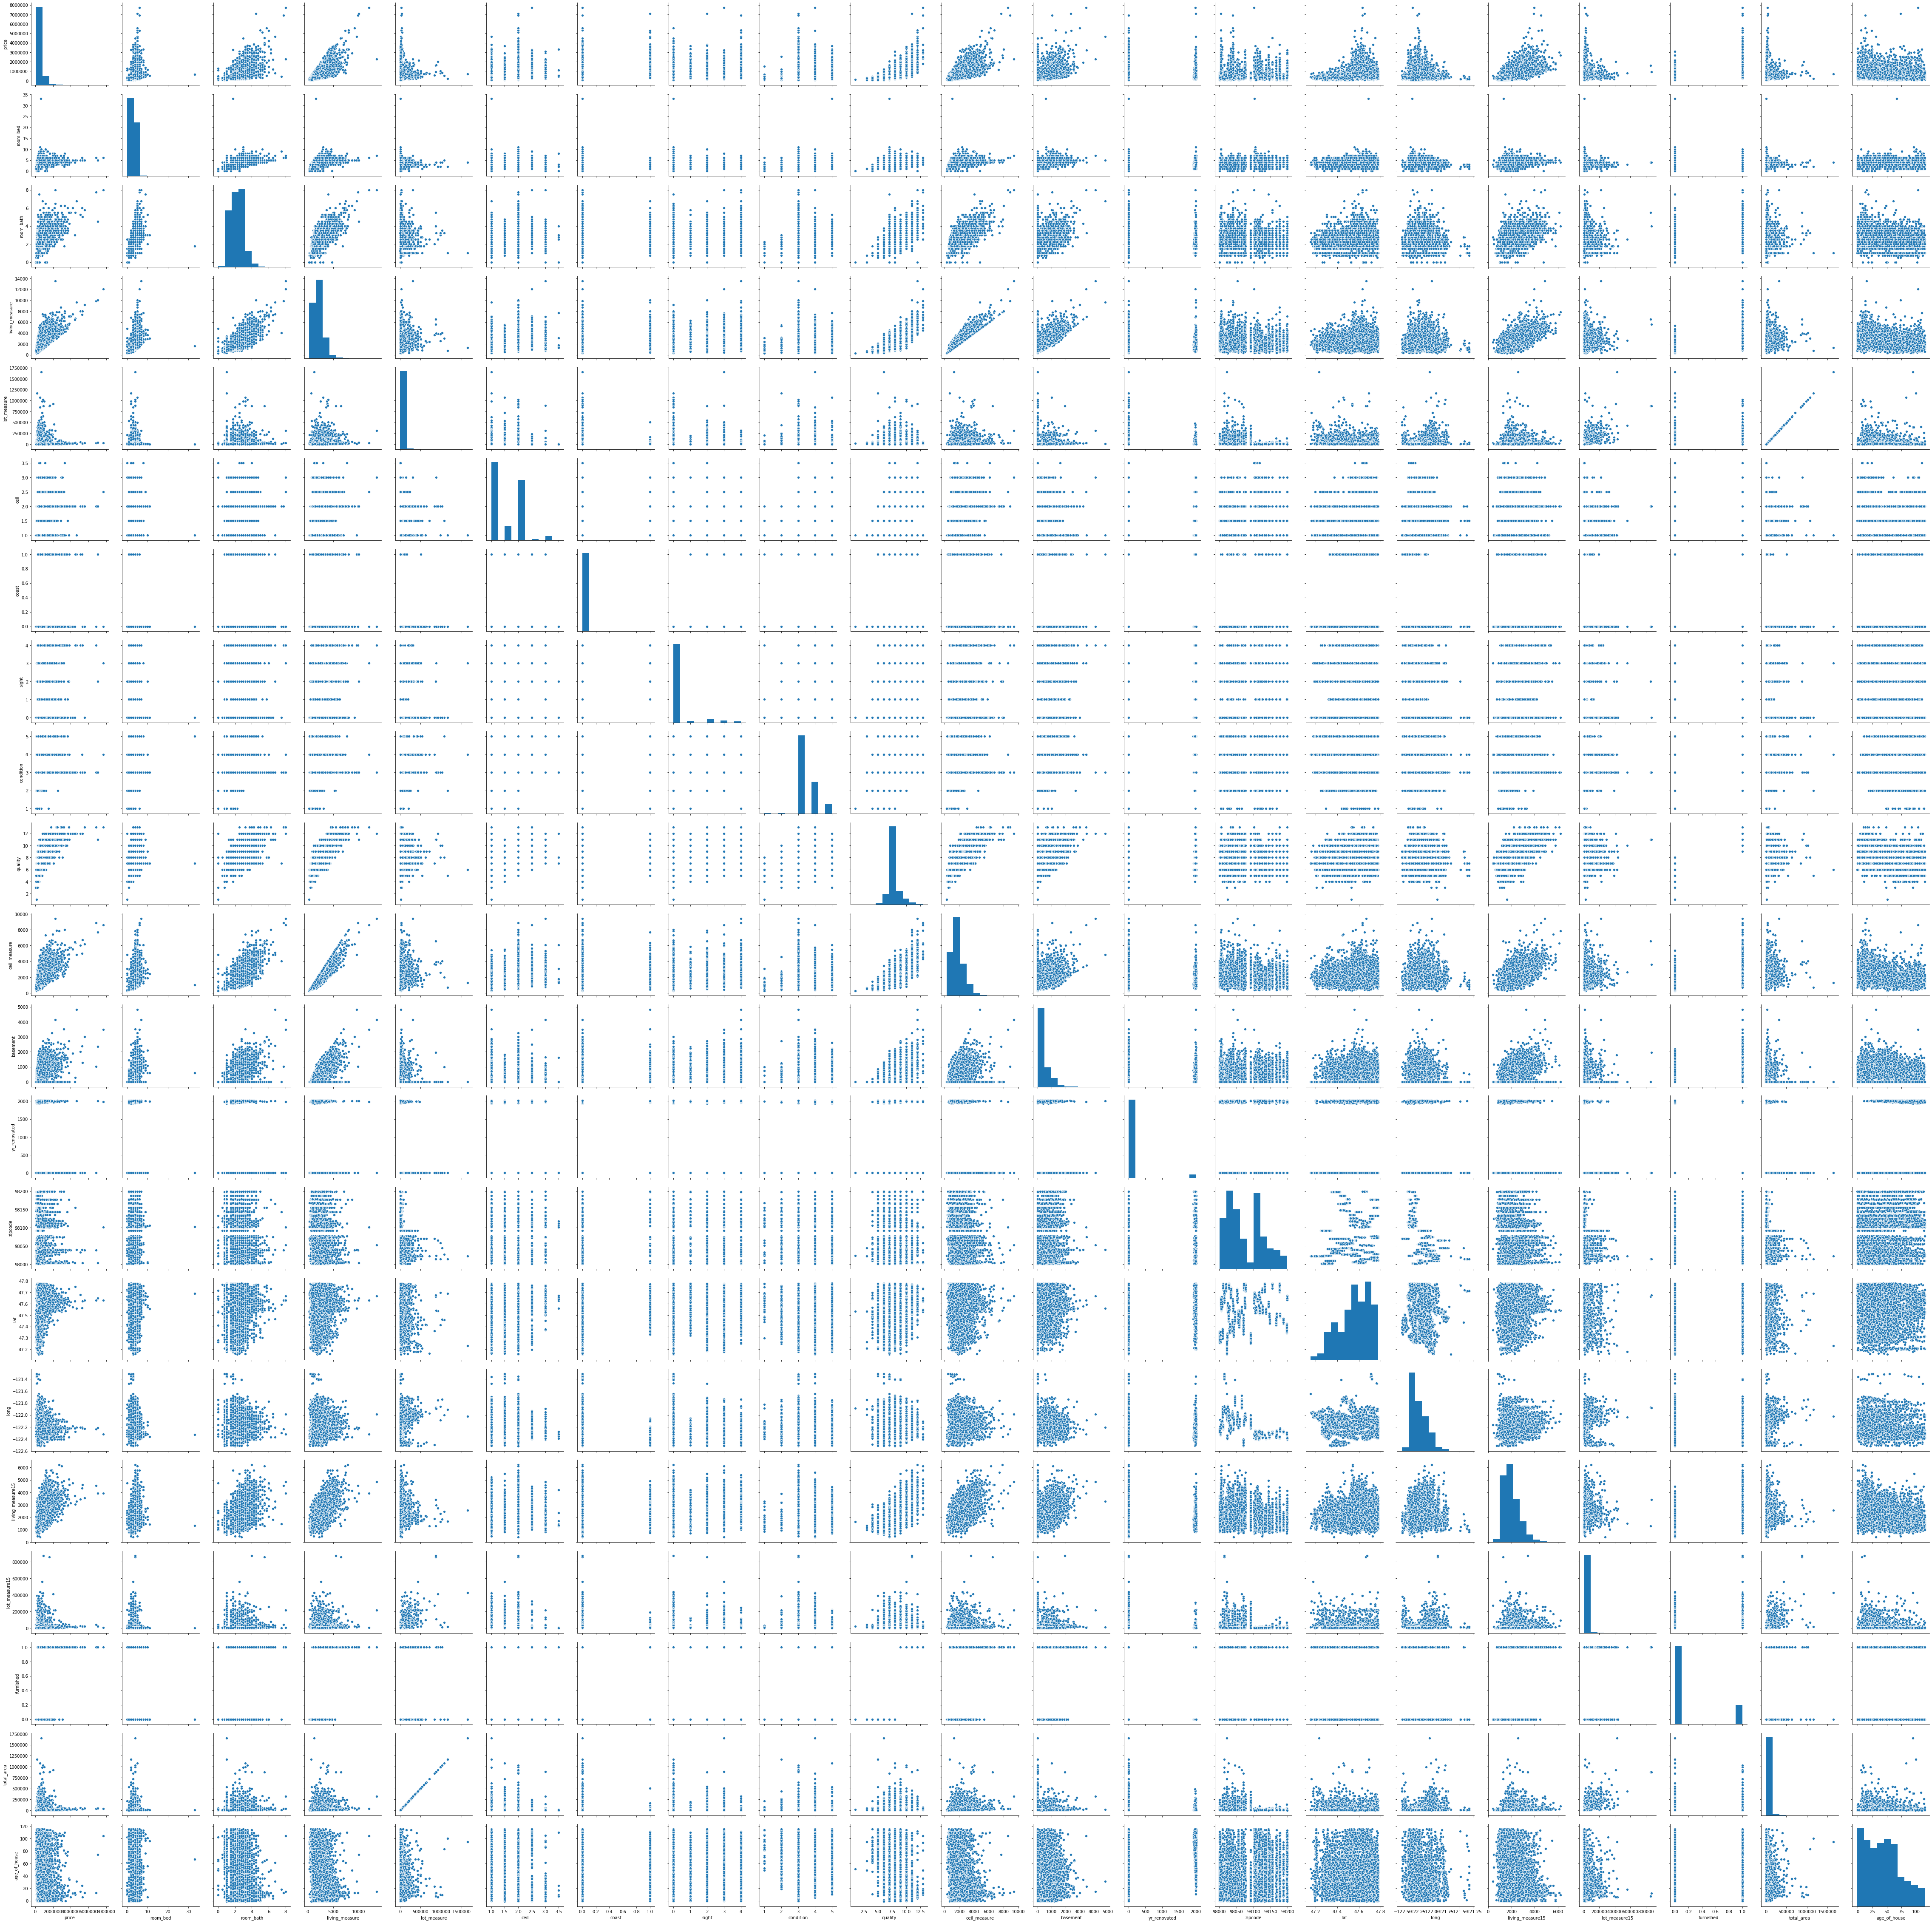

In [488]:
sns.pairplot(df, size = 3)

In [489]:
x = df['zipcode'].unique()
x.sort()
print(x)

[98001 98002 98003 98004 98005 98006 98007 98008 98010 98011 98014 98019
 98022 98023 98024 98027 98028 98029 98030 98031 98032 98033 98034 98038
 98039 98040 98042 98045 98052 98053 98055 98056 98058 98059 98065 98070
 98072 98074 98075 98077 98092 98102 98103 98105 98106 98107 98108 98109
 98112 98115 98116 98117 98118 98119 98122 98125 98126 98133 98136 98144
 98146 98148 98155 98166 98168 98177 98178 98188 98198 98199]


In [490]:
y = df['room_bed'].unique()
y.sort()
print(y)

[ 0  1  2  3  4  5  6  7  8  9 10 11 33]


In [491]:
z = df['room_bath'].unique()
z.sort()
print(z)

[0.   0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25 3.5
 3.75 4.   4.25 4.5  4.75 5.   5.25 5.5  5.75 6.   6.25 6.5  6.75 7.5
 7.75 8.  ]


In [492]:
# Creating room_bath groups
df.loc[(df['room_bath'] >= 0) & (df['room_bath'] < 2), 'room_bath'] = 1
df.loc[(df['room_bath'] >= 2) & (df['room_bath'] < 4), 'room_bath'] = 2
df.loc[(df['room_bath'] >= 4) & (df['room_bath'] < 6), 'room_bath'] = 3
df.loc[(df['room_bath'] >= 6) & (df['room_bath'] < 8), 'room_bath'] = 4

In [493]:
# Creating zipcode groups
df.loc[(df['zipcode'] >= 98001) & (df['zipcode'] < 98022), 'zipcode'] = 1
df.loc[(df['zipcode'] >= 98022) & (df['zipcode'] < 98039), 'zipcode'] = 2
df.loc[(df['zipcode'] >= 98039) & (df['zipcode'] < 98072), 'zipcode'] = 3
df.loc[(df['zipcode'] >= 98072) & (df['zipcode'] < 98112), 'zipcode'] = 4
df.loc[(df['zipcode'] >= 98112) & (df['zipcode'] < 98146), 'zipcode'] = 5
df.loc[(df['zipcode'] >= 98146), 'zipcode'] = 6

In [494]:
def odp_plots(df, col):
    f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 7.2))
    
    # Boxplot to check outliers
    sns.boxplot(x = col, data = df, ax = ax1, orient = 'v', color = 'darkslategrey')
    
    # Distribution plot with outliers
    sns.distplot(df[col], ax = ax2, color = 'teal', fit = norm).set_title(f'Distribution of {col} with outliers')
    
    # Removing outliers, but in a new dataframe
    upperbound, lowerbound = np.percentile(df[col], [1, 99])
    y = pd.DataFrame(np.clip(df[col], upperbound, lowerbound))
    
    # Distribution plot without outliers
    sns.distplot(y[col], ax = ax3, color = 'tab:orange', fit = norm).set_title(f'Distribution of {col} without outliers')
    
    kwargs = {'fontsize':14, 'color':'black'}
    ax1.set_title(col + ' Boxplot Analysis', **kwargs)
    ax1.set_xlabel('Box', **kwargs)
    ax1.set_ylabel(col + ' Values', **kwargs)

    return plt.show()


living_measure column --------------------------------------------------------------------------------------------------------------


price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
33   1570000         5        3.0            6070        14731   2.0      0   
121  1280000         6        3.0            6160        27490   2.0      0   
197  1670000         5        2.0            4320        40816   2.0      0   
255  1430000         4        3.0            4630        24054   2.0      0   
264  6890000         6        4.0            9890        31374   2.0      0   

     sight  condition  quality  ...  basement  yr_renovated  zipcode      lat  \
33       0          3       11  ...         0             0        3  47.5306   
121      0          3       11  ...      2120             0        4  47.6094   
197      0          4       11  ...         0             0        1  47.6440   
255      3          3       11  ...         0             0        4  47.5870   
264      4          3       13  ...      1030             0        3  47.6305   

        long  living_measure15  lot_measure15  furnished  total_area  \
33  -122.134              4750          13404          1       20801   
121 -122.023              4225           9100          1       33650   
197 -122.185              4320          44584          1       45136   
255 -121.966              4630          17584          1       28684   
264 -122.240              4540          42730          1       41264   

     age_of_house  
33             10  
121             7  
197            18  
255            10  
264            13  

[5 rows x 21 columns]

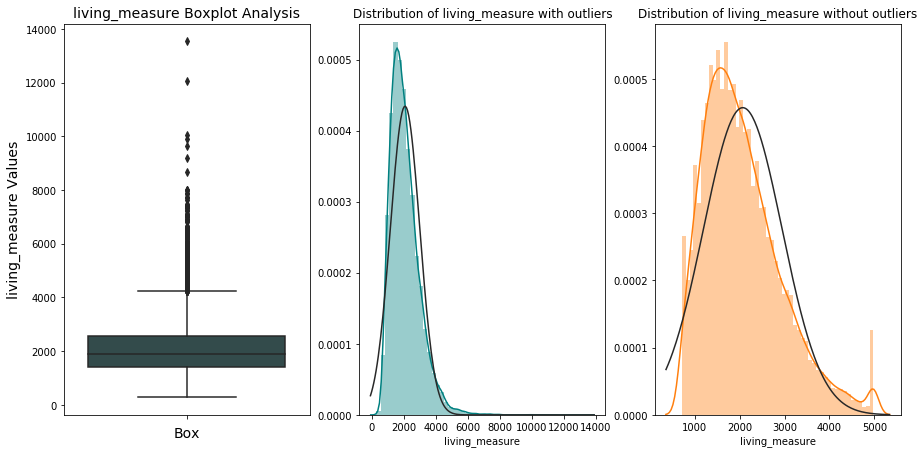

In [495]:
# Outlier, distribution for 'living_measure' column
Q3 = df['living_measure'].quantile(0.75)
Q1 = df['living_measure'].quantile(0.25)
IQR = Q3 - Q1

print('living_measure column', '--'*55)
display(df.loc[(df['living_measure'] < (Q1 - 1.5 * IQR)) | (df['living_measure'] > (Q3 + 1.5 * IQR))].head())

odp_plots(df, 'living_measure')


lot_measure column --------------------------------------------------------------------------------------------------------------


price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
7   480000         3        1.0            2100        67269   1.0      0   
12  785000         4        2.0            3440        56192   2.0      0   
36  759950         3        2.0            3100        23790   2.0      0   
40  243800         3        1.0            1140        27760   1.0      0   
45  129000         2        1.0            1150        30184   1.0      0   

    sight  condition  quality  ...  basement  yr_renovated  zipcode      lat  \
7       0          4        7  ...       880             0        2  47.7592   
12      0          3        9  ...         0             0        3  47.6969   
36      0          3        9  ...         0             0        4  47.5882   
40      0          4        6  ...         0             0        2  47.5372   
45      0          3        6  ...         0             0        3  47.4492   

       long  living_measure15  lot_measure15  furnished  total_area  \
7  -122.230              1610          15999          0       69369   
12 -122.046              3150          44431          1       59632   
36 -122.011              2250          40854          1       26890   
40 -121.972              1690          87300          0       28900   
45 -122.200              1670          19684          0       31334   

    age_of_house  
7             65  
12            21  
36            12  
40            33  
45            64  

[5 rows x 21 columns]

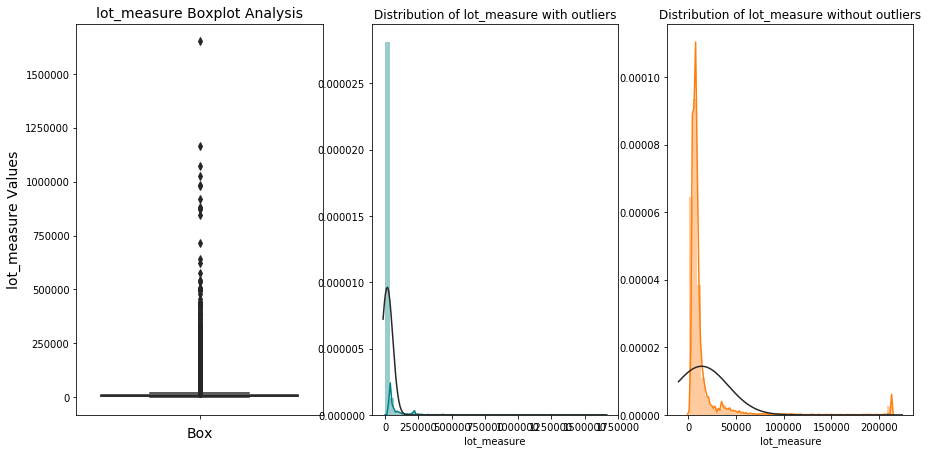

In [496]:
# Outlier, distribution for 'lot_measure' column
Q3 = df['lot_measure'].quantile(0.75)
Q1 = df['lot_measure'].quantile(0.25)
IQR = Q3 - Q1

print('lot_measure column', '--'*55)
display(df.loc[(df['lot_measure'] < (Q1 - 1.5 * IQR)) | (df['lot_measure'] > (Q3 + 1.5 * IQR))].head())

odp_plots(df, 'lot_measure')


ceil_measure column --------------------------------------------------------------------------------------------------------------


price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
33   1570000         5        3.0            6070        14731   2.0      0   
105   900000         4        2.0            3810       217800   2.0      0   
121  1280000         6        3.0            6160        27490   2.0      0   
197  1670000         5        2.0            4320        40816   2.0      0   
232  1080000         4        2.0            3990         5267   2.0      0   

     sight  condition  quality  ...  basement  yr_renovated  zipcode      lat  \
33       0          3       11  ...         0             0        3  47.5306   
105      0          3        9  ...         0             0        4  47.7696   
121      0          3       11  ...      2120             0        4  47.6094   
197      0          4       11  ...         0             0        1  47.6440   
232      0          3       10  ...         0             0        1  47.5641   

        long  living_measure15  lot_measure15  furnished  total_area  \
33  -122.134              4750          13404          1       20801   
105 -122.021              2580         217364          1      221610   
121 -122.023              4225           9100          1       33650   
197 -122.185              4320          44584          1       45136   
232 -122.124              3230           6481          1        9257   

     age_of_house  
33             10  
105            12  
121             7  
197            18  
232             6  

[5 rows x 21 columns]

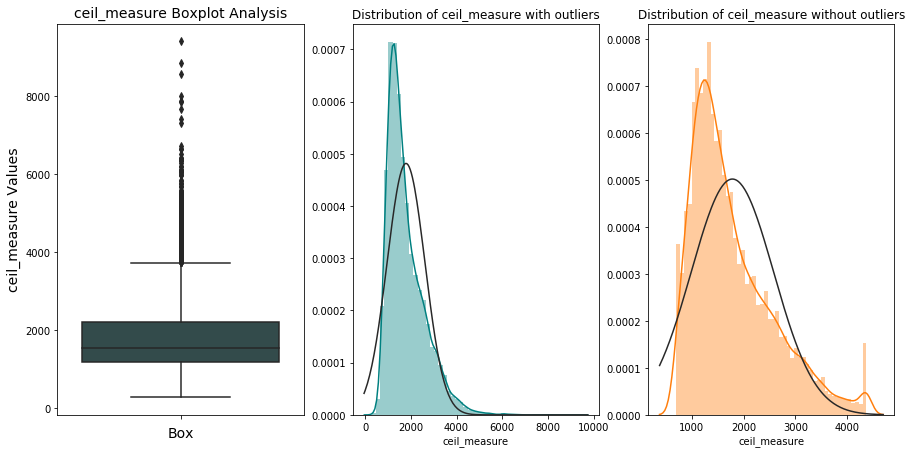

In [497]:
# Outlier, distribution for 'ceil_measure' column
Q3 = df['ceil_measure'].quantile(0.75)
Q1 = df['ceil_measure'].quantile(0.25)
IQR = Q3 - Q1

print('ceil_measure column', '--'*55)
display(df.loc[(df['ceil_measure'] < (Q1 - 1.5 * IQR)) | (df['ceil_measure'] > (Q3 + 1.5 * IQR))].head())

odp_plots(df, 'ceil_measure')

basement column --------------------------------------------------------------------------------------------------------------


price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
14   554000         5        2.0            3440        12900   1.0      0   
28  1450000         3        2.0            3940         9671   1.0      0   
46   469000         4        2.0            3550        13938   1.0      0   
50  1660000         4        2.0            3520        19200   1.0      1   
51   592500         4        2.0            3370        35150   1.0      0   

    sight  condition  quality  ...  basement  yr_renovated  zipcode      lat  \
14      2          4        8  ...      1720             0        6  47.4426   
28      4          5        9  ...      1800             0        1  47.5654   
46      0          5        8  ...      1450             0        6  47.4250   
50      4          4        9  ...      1570             0        5  47.5250   
51      0          5        8  ...      1600             0        2  47.4610   

       long  living_measure15  lot_measure15  furnished  total_area  \
14 -122.342              2100          10751          0       16340   
28 -122.158              3390           9360          1       13611   
46 -122.283              2050           9000          0       17488   
50 -122.393              2450           7000          1       22720   
51 -122.002              2920          41241          0       38520   

    age_of_house  
14            56  
28            47  
46            49  
50            63  
51            21  

[5 rows x 21 columns]

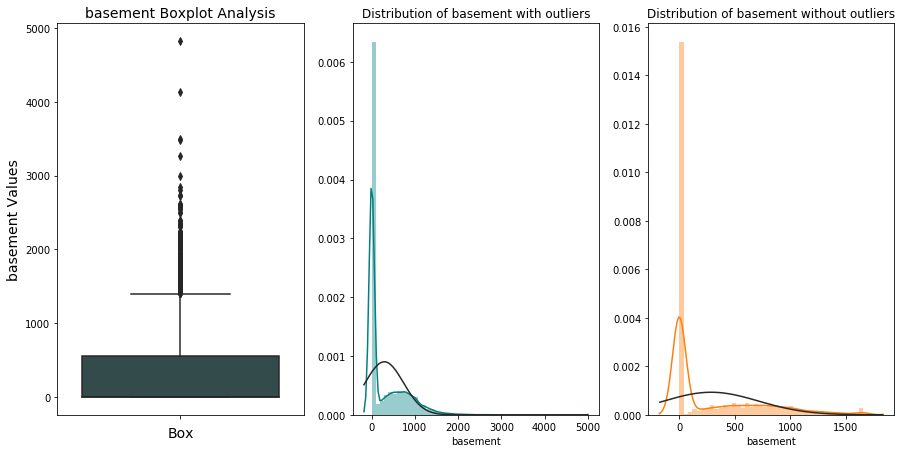

In [498]:
# Outlier, distribution for 'basement' column
Q3 = df['basement'].quantile(0.75)
Q1 = df['basement'].quantile(0.25)
IQR = Q3 - Q1

print('basement column', '--'*55)
display(df.loc[(df['basement'] < (Q1 - 1.5 * IQR)) | (df['basement'] > (Q3 + 1.5 * IQR))].head())

odp_plots(df, 'basement')

living_measure15 column --------------------------------------------------------------------------------------------------------------


price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
33   1570000         5        3.0            6070        14731   2.0      0   
121  1280000         6        3.0            6160        27490   2.0      0   
125  2300000         4        3.0            3970         9778   2.0      0   
171   725000         3        2.0            3690         8837   2.0      0   
197  1670000         5        2.0            4320        40816   2.0      0   

     sight  condition  quality  ...  basement  yr_renovated  zipcode      lat  \
33       0          3       11  ...         0             0        3  47.5306   
121      0          3       11  ...      2120             0        4  47.6094   
125      2          4       11  ...       580             0        5  47.6312   
171      0          3       10  ...         0             0        3  47.5402   
197      0          4       11  ...         0             0        1  47.6440   

        long  living_measure15  lot_measure15  furnished  total_area  \
33  -122.134              4750          13404          1       20801   
121 -122.023              4225           9100          1       33650   
125 -122.366              3970           8460          1       13748   
171 -121.876              3690           9585          1       12527   
197 -122.185              4320          44584          1       45136   

     age_of_house  
33             10  
121             7  
125            86  
171            13  
197            18  

[5 rows x 21 columns]

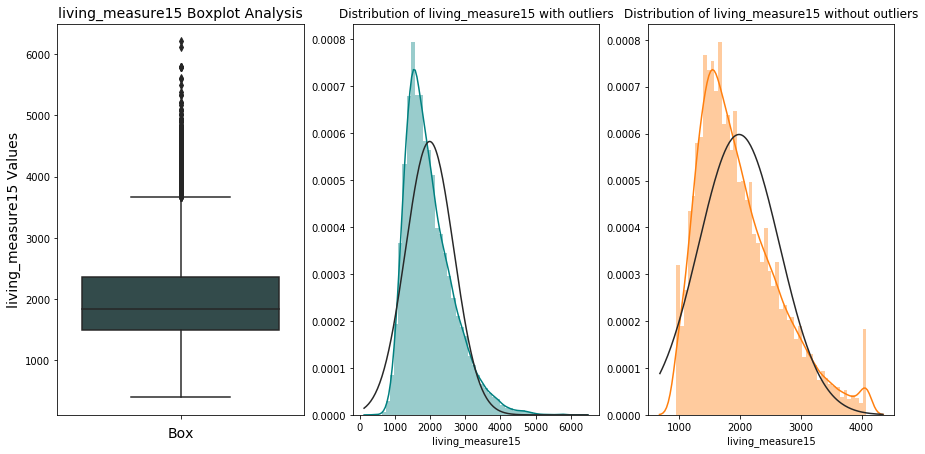

In [499]:
# Outlier, distribution for 'living_measure15' column
Q3 = df['living_measure15'].quantile(0.75)
Q1 = df['living_measure15'].quantile(0.25)
IQR = Q3 - Q1

print('living_measure15 column', '--'*55)
display(df.loc[(df['living_measure15'] < (Q1 - 1.5 * IQR)) | (df['living_measure15'] > (Q3 + 1.5 * IQR))].head())

odp_plots(df, 'living_measure15')

lot_measure15 column --------------------------------------------------------------------------------------------------------------


price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
12  785000         4        2.0            3440        56192   2.0      0   
36  759950         3        2.0            3100        23790   2.0      0   
40  243800         3        1.0            1140        27760   1.0      0   
45  129000         2        1.0            1150        30184   1.0      0   
51  592500         4        2.0            3370        35150   1.0      0   

    sight  condition  quality  ...  basement  yr_renovated  zipcode      lat  \
12      0          3        9  ...         0             0        3  47.6969   
36      0          3        9  ...         0             0        4  47.5882   
40      0          4        6  ...         0             0        2  47.5372   
45      0          3        6  ...         0             0        3  47.4492   
51      0          5        8  ...      1600             0        2  47.4610   

       long  living_measure15  lot_measure15  furnished  total_area  \
12 -122.046              3150          44431          1       59632   
36 -122.011              2250          40854          1       26890   
40 -121.972              1690          87300          0       28900   
45 -122.200              1670          19684          0       31334   
51 -122.002              2920          41241          0       38520   

    age_of_house  
12            21  
36            12  
40            33  
45            64  
51            21  

[5 rows x 21 columns]

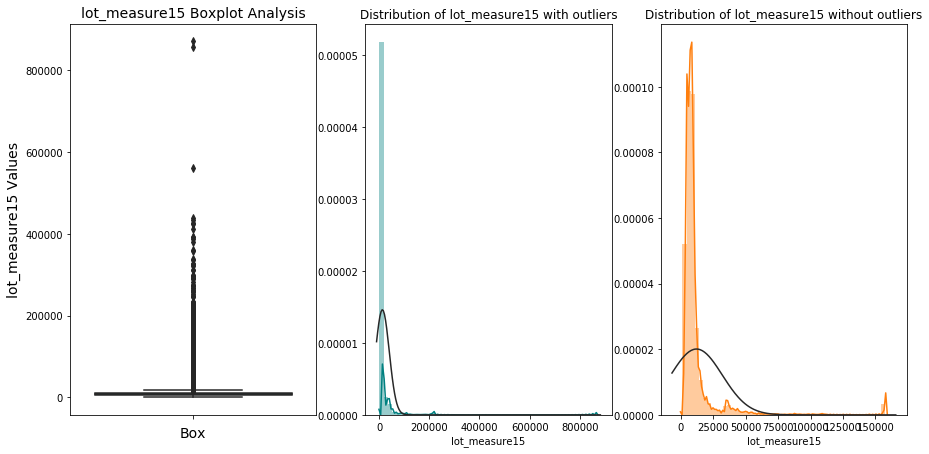

In [500]:
# Outlier, distribution for 'lot_measure15' column
Q3 = df['lot_measure15'].quantile(0.75)
Q1 = df['lot_measure15'].quantile(0.25)
IQR = Q3 - Q1

print('lot_measure15 column', '--'*55)
display(df.loc[(df['lot_measure15'] < (Q1 - 1.5 * IQR)) | (df['lot_measure15'] > (Q3 + 1.5 * IQR))].head())

odp_plots(df, 'lot_measure15')

total_area column --------------------------------------------------------------------------------------------------------------


price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
7   480000         3        1.0            2100        67269   1.0      0   
12  785000         4        2.0            3440        56192   2.0      0   
36  759950         3        2.0            3100        23790   2.0      0   
40  243800         3        1.0            1140        27760   1.0      0   
45  129000         2        1.0            1150        30184   1.0      0   

    sight  condition  quality  ...  basement  yr_renovated  zipcode      lat  \
7       0          4        7  ...       880             0        2  47.7592   
12      0          3        9  ...         0             0        3  47.6969   
36      0          3        9  ...         0             0        4  47.5882   
40      0          4        6  ...         0             0        2  47.5372   
45      0          3        6  ...         0             0        3  47.4492   

       long  living_measure15  lot_measure15  furnished  total_area  \
7  -122.230              1610          15999          0       69369   
12 -122.046              3150          44431          1       59632   
36 -122.011              2250          40854          1       26890   
40 -121.972              1690          87300          0       28900   
45 -122.200              1670          19684          0       31334   

    age_of_house  
7             65  
12            21  
36            12  
40            33  
45            64  

[5 rows x 21 columns]

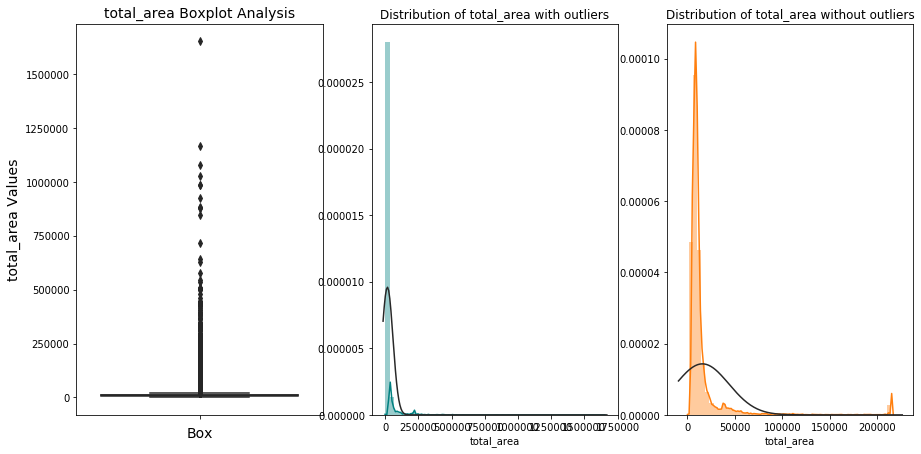

In [501]:
# Outlier, distribution for 'total_area' column
Q3 = df['total_area'].quantile(0.75)
Q1 = df['total_area'].quantile(0.25)
IQR = Q3 - Q1

print('total_area column', '--'*55)
display(df.loc[(df['total_area'] < (Q1 - 1.5 * IQR)) | (df['total_area'] > (Q3 + 1.5 * IQR))].head())

odp_plots(df, 'total_area')

In [502]:
numerical_features = ['living_measure','lot_measure','ceil_measure','basement','age_of_house','lat','long',
                      'living_measure15','lot_measure15','total_area']

In [503]:
categorical_features = ['room_bed','room_bath','ceil','coast','sight','condition','quality','zipcode','furnished']

A quick check to find columns that contain outliers, graphical
------------------------------------------------------------------------------------------------------------------------


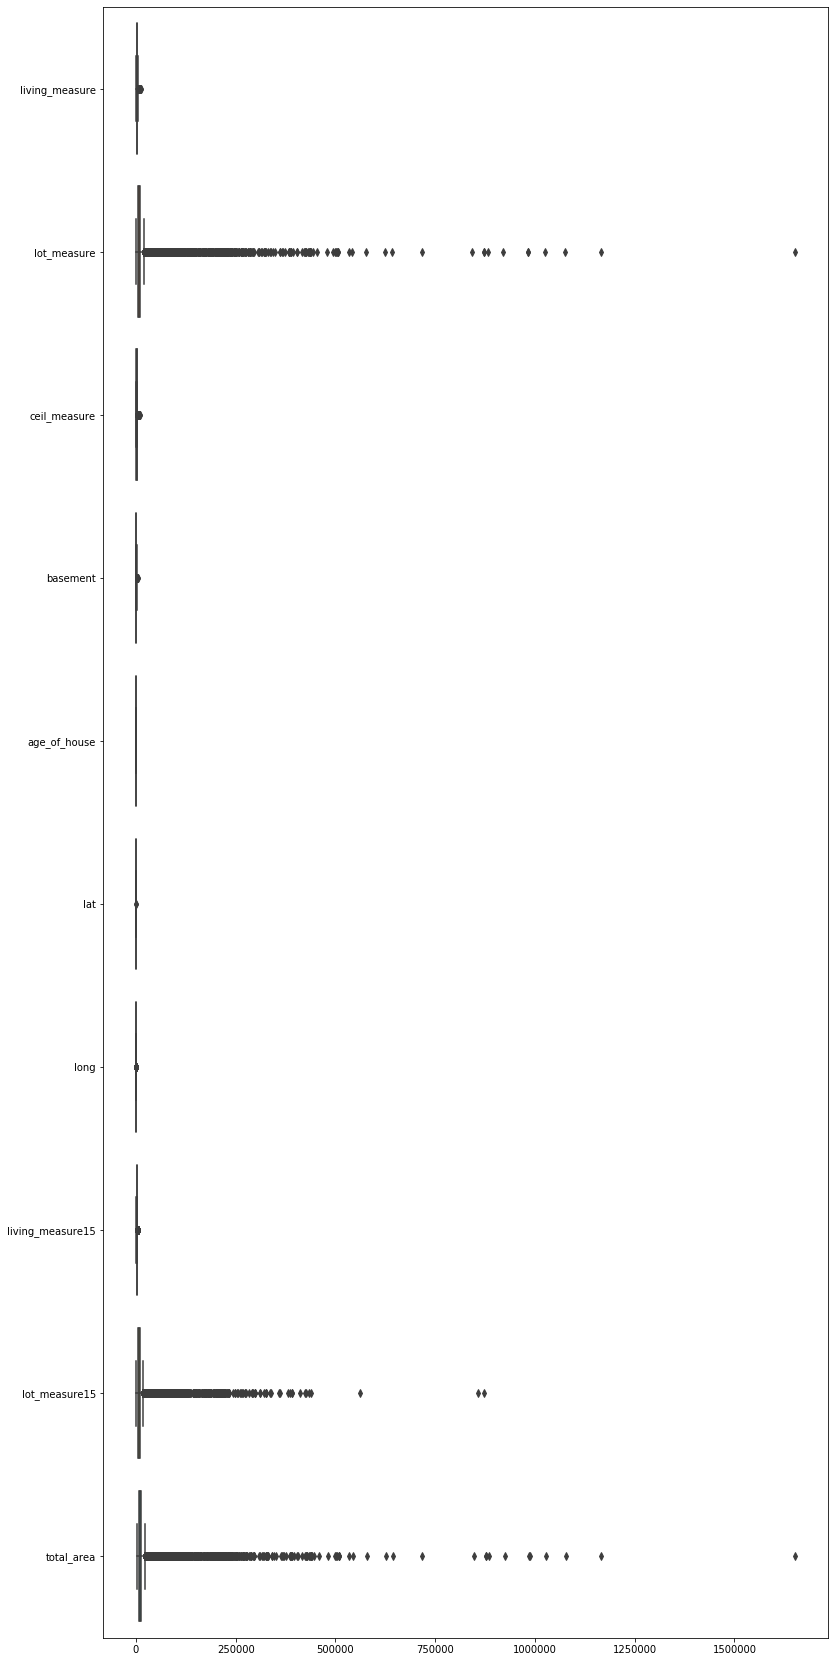

In [504]:
# A quick check to find columns that contain outliers
print('A quick check to find columns that contain outliers, graphical'); print('--'*60)

fig = plt.figure(figsize = (13, 30))
ax = sns.boxplot(data = df[numerical_features], orient = 'h')

In [505]:
for cols in numerical_features:
    Q3 = df[cols].quantile(0.75)
    Q1 = df[cols].quantile(0.25)
    IQR = Q3 - Q1
    df[cols] = np.where(df[cols] > (Q3 + 1.5*IQR), df[cols].quantile(0.75), df[cols])
    df[cols] = np.where(df[cols] < (Q1 - 1.5*IQR), df[cols].quantile(0.25), df[cols])

A quick check to find if our technique worked
------------------------------------------------------------------------------------------------------------------------


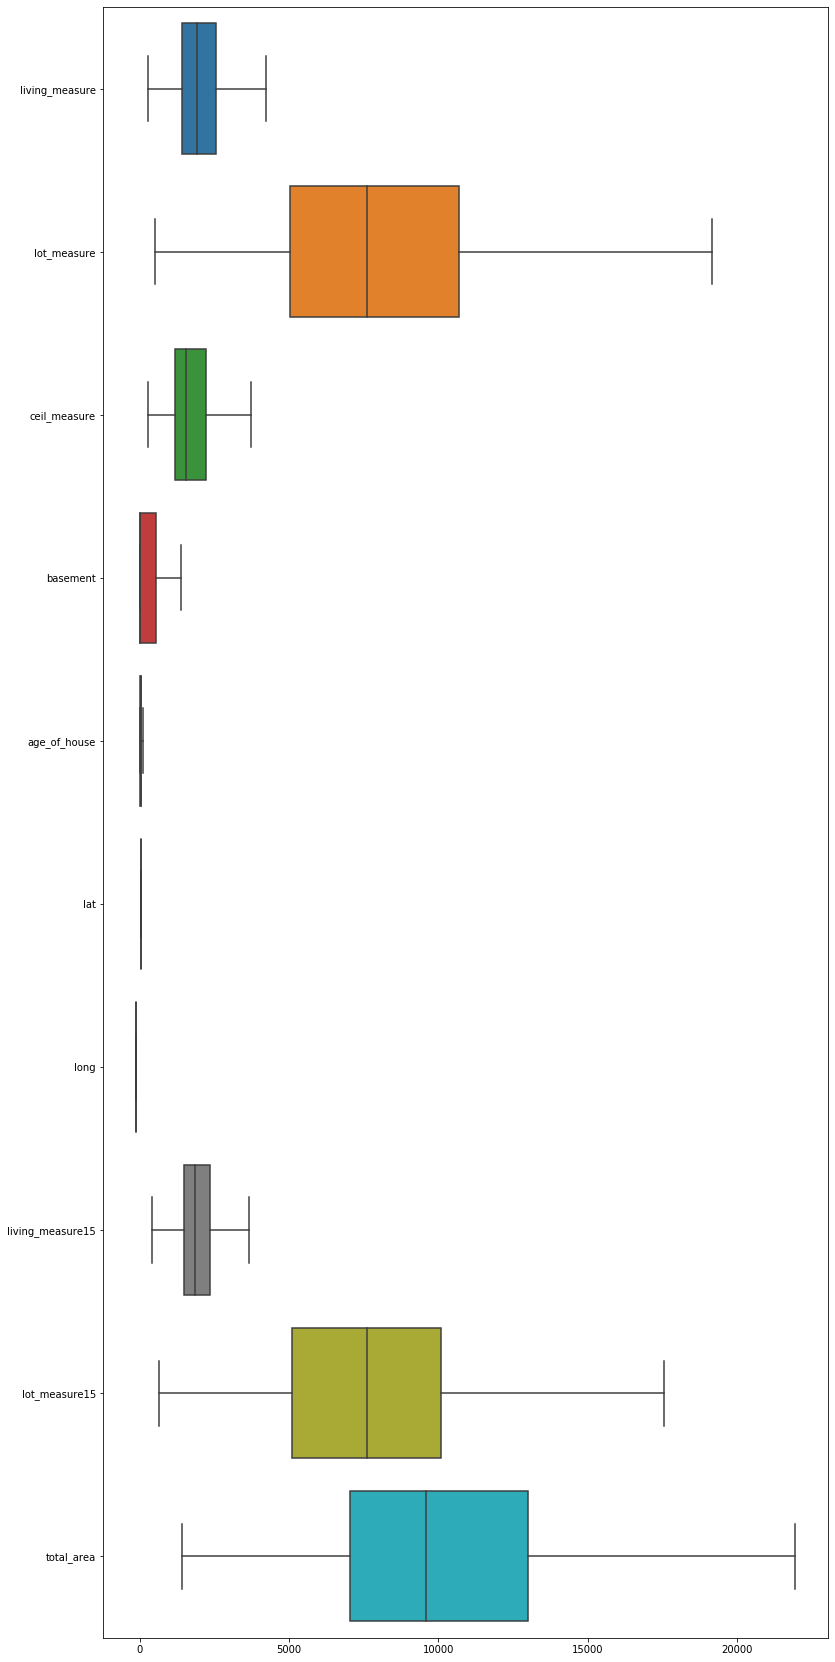

In [506]:
# A quick check to see if this technique worked 
print('A quick check to find if our technique worked'); print('--'*60)

fig = plt.figure(figsize = (13, 30))
ax = sns.boxplot(data = df[numerical_features], orient = 'h')

In [507]:
X1.shape
y1.shape

(1000,)

In [508]:
df['room_bed'].unique()

array([ 4,  3,  2,  5,  6,  1,  8, 33,  7,  0,  9, 10, 11], dtype=int64)

In [509]:
# pd.get_dummies
cols_to_transform = ['room_bed','room_bath','ceil','coast','sight','condition','quality','zipcode','furnished']
df = pd.get_dummies(df, columns = cols_to_transform) #, drop_first = True)

print('Got dummies for \n', cols_to_transform)
df.info()

Got dummies for 
 ['room_bed', 'room_bath', 'ceil', 'coast', 'sight', 'condition', 'quality', 'zipcode', 'furnished']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 68 columns):
price               21613 non-null int64
living_measure      21613 non-null float64
lot_measure         21613 non-null float64
ceil_measure        21613 non-null float64
basement            21613 non-null float64
yr_renovated        21613 non-null int64
lat                 21613 non-null float64
long                21613 non-null float64
living_measure15    21613 non-null float64
lot_measure15       21613 non-null float64
total_area          21613 non-null float64
age_of_house        21613 non-null float64
room_bed_0          21613 non-null uint8
room_bed_1          21613 non-null uint8
room_bed_2          21613 non-null uint8
room_bed_3          21613 non-null uint8
room_bed_4          21613 non-null uint8
room_bed_5          21613 non-null uint8
room_bed_6     

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014B72AF2148>,
      dtype=object)

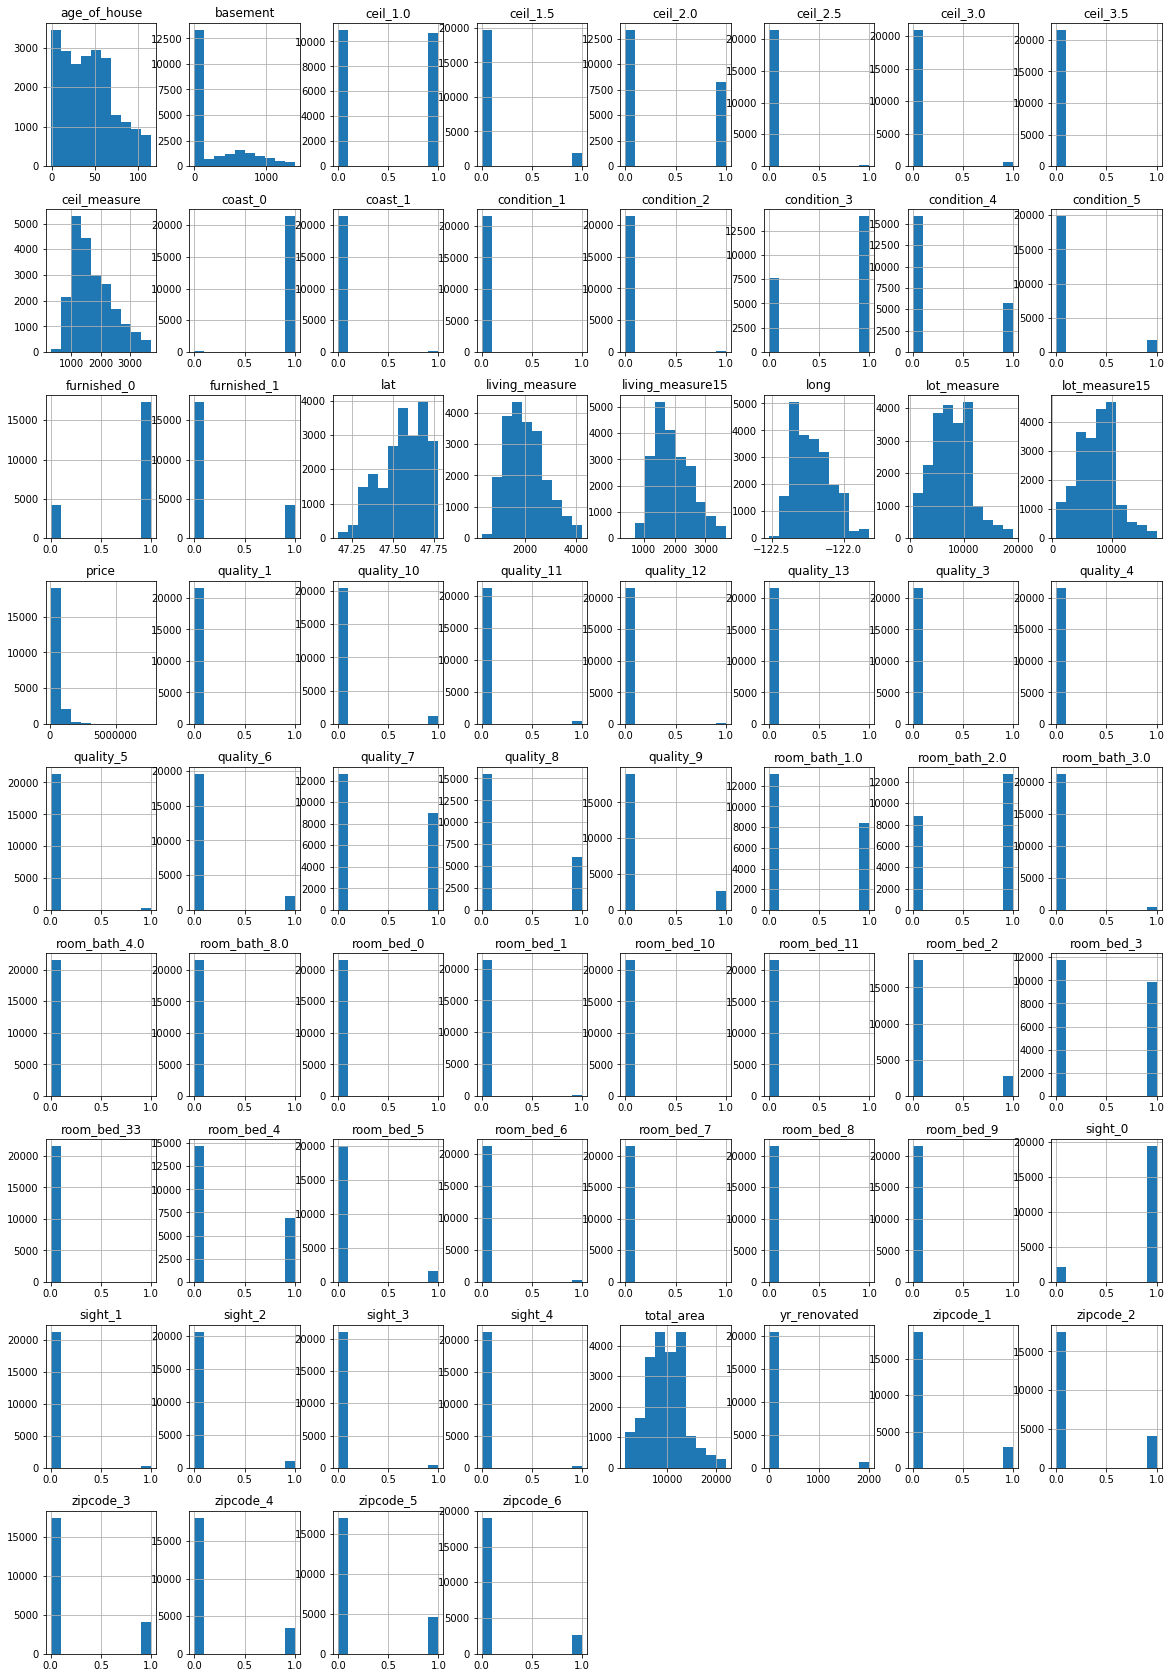

In [510]:
df.hist(figsize=(20,30))

In [511]:
df.head()

price  living_measure  lot_measure  ceil_measure  basement  yr_renovated  \
0  808100          3020.0      13457.0        3020.0       0.0             0   
1  277500          2550.0       7500.0        1750.0     800.0             0   
2  404000          2370.0       4324.0        2370.0       0.0             0   
3  300000           820.0       3844.0         820.0       0.0             0   
4  699000          1400.0       4050.0        1400.0       0.0             0   

       lat     long  living_measure15  lot_measure15  ...  quality_12  \
0  47.7174 -122.336            2120.0         7553.0  ...           0   
1  47.3165 -122.386            2260.0         8800.0  ...           0   
2  47.3515 -121.999            2370.0         4348.0  ...           0   
3  47.7049 -122.349            1520.0         3844.0  ...           0   
4  47.6768 -122.269            1900.0         5940.0  ...           0   

   quality_13  zipcode_1  zipcode_2  zipcode_3  zipcode_4  zipcode_5  \
0           0          0          0          0          0          1   
1           0          0          1          0          0          0   
2           0          0          1          0          0          0   
3           0          0          0          0          0          1   
4           0          0          0          0          0          1   

   zipcode_6  furnished_0  furnished_1  
0          0            0            1  
1          0            1            0  
2          0            1            0  
3          0            1            0  
4          0            1            0  

[5 rows x 68 columns]

In [512]:
X,y=df.drop(columns='price'),df['price']

In [513]:
scaler = StandardScaler()
scled_features = scaler.fit_transform(X)

In [514]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [515]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.25, random_state=1)

# **Model Building**

**linear Regression**

In [516]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [517]:
results={}

In [518]:
lr = LinearRegression() # Linear Regression 
lasso = Lasso() # Lasso Regression 
ridge = Ridge() # Ridge Regression

In [519]:
#Fitting of the models
lr.fit(X_train, y_train) 
lasso.fit(X_train, y_train) 
ridge.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test) 
y_pred_lasso = lasso.predict(X_test) 
y_pred_ridge = ridge.predict(X_test)
acc1=lr.score(X_test, y_test)
acc2=lasso.score(X_test, y_test)
acc3=ridge.score(X_test, y_test)
print("Accuracy of linear regression:",acc1)
print("Accuracy of lasso regression:",acc2)
print("Accuracy of ridge regression:",acc3)

Accuracy of linear regression: 0.7247307987615725
Accuracy of lasso regression: 0.7197590033185964
Accuracy of ridge regression: 0.7227733063918524


**Metrics evaluation**

**RMSE metric**

In [520]:
print("RMSE of Linear Regression",rmsle(y_test, y_pred_lr))
print("RMSE of Lasso Regression",rmsle(y_test, y_pred_lasso))
print("RMSE of Ridge Regression",rmsle(y_test, y_pred_ridge))

RMSE of Linear Regression 193480.92836758387
RMSE of Lasso Regression 195220.39433395094
RMSE of Ridge Regression 194167.64977336323


**Mean Absolute Error**

In [521]:
print("MAE of Linear Regression",metrics.mean_absolute_error(y_test, y_pred_lr))
print("MAE of Lasso Regression",metrics.mean_absolute_error(y_test, y_pred_lasso))
print("MAE of Ridge Regression",metrics.mean_absolute_error(y_test, y_pred_ridge))

MAE of Linear Regression 118677.95278909412
MAE of Lasso Regression 118763.56922040529
MAE of Ridge Regression 118748.03369857592


**R squared**

In [522]:
print("R-squared of Linear Regression",metrics.r2_score(y_test, y_pred_lr))
print("R-squared of Lasso Regression",metrics.r2_score(y_test,y_pred_lasso))
print("R-squared of Ridge Regression",metrics.r2_score(y_test, y_pred_ridge))

R-squared of Linear Regression 0.7247307987615725
R-squared of Lasso Regression 0.7197590033185964
R-squared of Ridge Regression 0.7227733063918524


In [523]:
# We are going to go forward with R squared as it is easier to explain with percentages.

In [524]:
results['LR']=metrics.r2_score(y_test, y_pred_lr) #LR stands for Linear Regression
results['Las']=metrics.r2_score(y_test,y_pred_lasso) #Las stands for Lasso Regresssion
results['Rid']=metrics.r2_score(y_test, y_pred_ridge) #Rid stands for Ridghe Regression

**Decision Tree Regressor**

In [525]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [526]:
y_pred = dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)

Performance on training data using DT: 0.9999237367827088
Performance on testing data using DT: 0.7082121166842077
Accuracy DT:  0.7082121166842077


In [527]:
results['DT']=metrics.r2_score(y_test, y_pred) # DT stands for Decision trees

**K-fold cross validation using decision trees**

In [528]:
num_folds = 15
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)

Average accuracy:  0.7275644463207699


In [529]:
results['DTk']=accuracy # DTk stands for Decision Trees using K-fold

**Pruning the decision trees to reduce overfitting**

In [530]:
pru_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
pru_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [531]:
pru_dt_model.score(X_test,y_test)

0.6505248843687457

In [532]:
results['pDT']=pru_dt_model.score(X_test,y_test) #pDT stands for pruned decision tree

# ensemble models

**gradient boosting regressor**

In [533]:
gbmTree = GradientBoostingRegressor(n_estimators=50)
gbmTree.fit(X_train,y_train)
y_pred = gbmTree.predict(X_test)
print('gbmTree on testing',metrics.r2_score(y_test, y_pred))
print("gbmTree on training" , gbmTree.score(X_train, y_train))

gbmTree on testing 0.798868531895561
gbmTree on training 0.8428843938259629


In [534]:
results['gbm']=metrics.r2_score(y_test, y_pred)

**k-fold**

In [535]:
num_folds = 10
kfold = KFold(n_splits=num_folds, random_state=42)
results1 = cross_val_score(gbmTree,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print(f'Average accuracy: {accuracy*100:.2f}')

Average accuracy: 80.31


In [536]:
results['gbmk']=accuracy

**Random forest regressor**

In [537]:
rfTree = RandomForestRegressor(n_estimators=50)
rfTree.fit(X_train,y_train)
y_pred = rfTree.predict(X_test)
print("Random forest Regressor on training" , rfTree.score(X_train, y_train))
print('RfTree on testing',metrics.r2_score(y_test, y_pred))

Random forest Regressor on training 0.9766353289318538
RfTree on testing 0.840292988765966


In [538]:
results['Rfr']=metrics.r2_score(y_test, y_pred)

**K-fold**

In [539]:
num_folds = 10
kfold = KFold(n_splits=num_folds, random_state=42)
results1 = cross_val_score(rfTree,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print(f'Average accuracy: {accuracy*100:.2f}')

Average accuracy: 85.75


In [540]:
results['RfrK']=accuracy

**Bagging Regressor**

In [541]:
bgcl = BaggingRegressor(n_estimators=50, oob_score= True)
bgcl = bgcl.fit(X_train,y_train)
y_pred = rfTree.predict(X_test)
print("bgcl on train data ", bgcl.score(X_train,y_train))
print('bgcl on test data',metrics.r2_score(y_test, y_pred))
print("out of bag score" , bgcl.oob_score_)

bgcl on train data  0.9785519152205528
bgcl on test data 0.840292988765966
out of bag score 0.8413297137050197


In [542]:
accuracy=metrics.r2_score(y_test, y_pred)

In [543]:
results['BgR']=accuracy

**Using K-fold**

In [544]:
num_folds = 15
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(bgcl,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)

Average accuracy:  0.8595730218154134


In [545]:
results['BgRK']=accuracy

**KNN Regressor**

In [546]:
model = KNeighborsRegressor(n_neighbors=3) # K=3
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [547]:
y_pred = model.predict(X_test)
print('Performance on training data using KNN:',model.score(X_train,y_train))
print('Performance on testing data using KNN:',model.score(X_test,y_test))
acc_K=metrics.r2_score(y_test, y_pred)
print('Accuracy KNN: ',acc_K)

Performance on training data using KNN: 0.7042164696773958
Performance on testing data using KNN: 0.38582851166453636
Accuracy KNN:  0.38582851166453636


In [548]:
results['KNNr']=acc_K

**Using K-fold**

In [549]:
num_folds = 15
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)

Average accuracy:  0.3910702009222057


In [550]:
results['KNNrK']=accuracy

**Using Support Vector Regressor**

In [551]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [552]:
y_pred = model.predict(X_test)
print('Performance on training data using SVR:',model.score(X_train,y_train))
print('Performance on testing data using SVR:',model.score(X_test,y_test))
acc_K=metrics.r2_score(y_test, y_pred)
print('Accuracy SVR: ',acc_K)

Performance on training data using SVR: 0.30543643359395467
Performance on testing data using SVR: 0.29155015233821324
Accuracy SVR:  0.29155015233821324


In [553]:
results['SVR']=acc_K

**XG_Boost**

In [554]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [555]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[21:00:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [556]:
acc_K=metrics.r2_score(y_test, preds)
print('Accuracy xgb: ',acc_K)
print(xg_reg.score(X_test,y_test))

Accuracy xgb:  0.34081585176046525
0.34081585176046525


In [557]:
results['xgb']=acc_K

**K-fold**

In [558]:
num_folds = 15
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(xg_reg,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)

[21:00:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:00:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:00:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:00:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:00:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:00:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:00:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:00:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:00:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [559]:
results['xgbK']=accuracy

**Light_GBM**

In [560]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [561]:
model_lgb.fit(X_train,y_train)

preds = model_lgb.predict(X_test)

In [562]:
acc_=metrics.r2_score(y_test, preds)
print('Accuracy xgb: ',acc_)
print(model_lgb.score(X_test,y_test))

Accuracy xgb:  0.827260448120759
0.827260448120759


In [563]:
results['lgb']=acc_

**lgb K-fold**

In [564]:
num_folds = 15
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model_lgb,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)

Average accuracy:  0.8572474085231252


In [565]:
results['lgbK']=accuracy

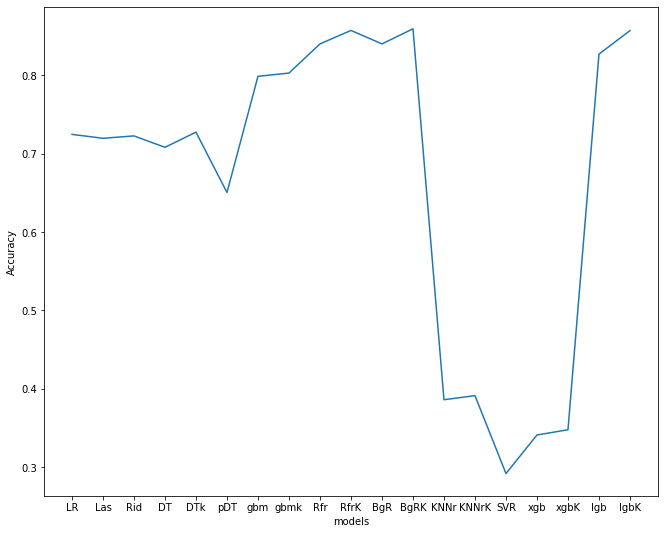

{'LR': 0.7247307987615725,
 'Las': 0.7197590033185964,
 'Rid': 0.7227733063918524,
 'DT': 0.7082121166842077,
 'DTk': 0.7275644463207699,
 'pDT': 0.6505248843687457,
 'gbm': 0.798868531895561,
 'gbmk': 0.803053821458359,
 'Rfr': 0.840292988765966,
 'RfrK': 0.8574757095780502,
 'BgR': 0.840292988765966,
 'BgRK': 0.8595730218154134,
 'KNNr': 0.38582851166453636,
 'KNNrK': 0.3910702009222057,
 'SVR': 0.29155015233821324,
 'xgb': 0.34081585176046525,
 'xgbK': 0.3474919038895837,
 'lgb': 0.827260448120759,
 'lgbK': 0.8572474085231252}

In [566]:
results
fig= plt.figure(figsize=(11,9))
list_of_tuple = [(k, v) for k, v in results.items()]
plt.plot(*zip(*list_of_tuple))
plt.xlabel('models')
plt.ylabel('Accuracy')
plt.show()
results

In [567]:
# The best accuracy that we are getting are from three models namely Random forest K-fold, Bagging regressor K-fold and Lightgbm K-fold.
# We see that Random forest trained alone and along with K-fold are giving more or less same results(their accuracies differ less) than the other models
# Hence we go forward with Random forest regressor.
# However we tune the hyperparameters of lightgbm to check if we have chosen right

**Model tuning using hyperparameters**

In [568]:
X_merged=X_train.append(X_val)

In [569]:
y_merged=y_train.append(y_val)

In [570]:
model_lgb = lgb.LGBMRegressor(random_state = 1)

In [571]:
print('Parameters currently in use:\n')
pprint(model_lgb.get_params())

Parameters currently in use:

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 1,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}


# RandomSearchCV for lightgbm

In [572]:
# Number of trees 
n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 15, num = 2)]   # returns evenly spaced 10 numbers
# Number of features to consider at every split
max_features = ['auto', 'log2']
# Maximum number of levels 
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
num_leaves= [27, 31, 61, 81, 127, 197, 231, 275, 302]
bagging_fraction = [0.5, 0.7, 0.8, 0.9]
learning_rate=[0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5]
min_data=[300, 400, 450, 500, 550, 650]
is_unbalance=[True, False]
max_bin=[3, 5, 10, 12, 18, 20, 22]
boosting_type = ['gbdt', 'dart']
bagging_freq= [3, 9, 11, 15, 17, 23, 31]  
feature_fraction=[0.5, 0.7, 0.8, 0.9]
lambda_l1= [0, 10, 20, 30, 40]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               "max_depth": max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'num_leaves': num_leaves,
               'bagging_fraction':bagging_fraction,
               'learning_rate':learning_rate,
               'min_data':min_data,
               'is_unbalance':is_unbalance,
               'max_bin':max_bin,
               'boosting_type':boosting_type,
               'bagging_freq':bagging_freq,
               'feature_fraction':feature_fraction,
               'lambda_l1':lambda_l1
              #'objective': 'binary', 
              #'metric': 'auc'
              }

pprint(random_grid)

{'bagging_fraction': [0.5, 0.7, 0.8, 0.9],
 'bagging_freq': [3, 9, 11, 15, 17, 23, 31],
 'boosting_type': ['gbdt', 'dart'],
 'bootstrap': [True, False],
 'feature_fraction': [0.5, 0.7, 0.8, 0.9],
 'is_unbalance': [True, False],
 'lambda_l1': [0, 10, 20, 30, 40],
 'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5],
 'max_bin': [3, 5, 10, 12, 18, 20, 22],
 'max_depth': [5, 10, None],
 'max_features': ['auto', 'log2'],
 'min_data': [300, 400, 450, 500, 550, 650],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 15],
 'num_leaves': [27, 31, 61, 81, 127, 197, 231, 275, 302]}


In [573]:
lgb_random = RandomizedSearchCV(estimator=model_lgb, param_distributions=random_grid,
                              n_iter = 5, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

In [574]:
lgb_random.fit(X_merged, y_merged)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LGBMRegressor(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=-1,
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, num_leaves=31,
                                           objective=None, random_state=1,
                                           reg_alpha=0.0, reg_lambda=0.0,
                                           silent=T...
                                        'max_bin': [3, 5, 10, 12, 18, 20, 22],
                                        'max_depth': [5, 

In [575]:
lgb_random.best_params_

{'num_leaves': 127,
 'n_estimators': 10,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'min_data': 500,
 'max_features': 'log2',
 'max_depth': 5,
 'max_bin': 18,
 'learning_rate': 0.5,
 'lambda_l1': 10,
 'is_unbalance': False,
 'feature_fraction': 0.9,
 'bootstrap': True,
 'boosting_type': 'gbdt',
 'bagging_freq': 15,
 'bagging_fraction': 0.8}

In [576]:
best_random = lgb_random.best_estimator_   # best ensemble model (with optimal combination of hyperparameters)

In [577]:
best_random.score(X_test , y_test)

0.7232759963095233

In [578]:
# This is the best the randomizedsearchCV could do given the range of values we submitted. The optimal accuracy by tuning the hyperparameters is 72.32%

# RandomSearchCV for random forest

In [579]:
rf = RandomForestRegressor(random_state = 1)

In [580]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 15, num = 2)]   # returns evenly spaced 10 numbers
# Number of features to consider at every split
max_features = ['auto', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 10, None],
 'max_features': ['auto', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 15]}


In [581]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 5, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_merged, y_merged)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   23.4s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [582]:
rf_random.best_params_

{'n_estimators': 15,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': None,
 'bootstrap': False}

In [583]:
best_random = rf_random.best_estimator_   # best ensemble model (with optimal combination of hyperparameters)

In [584]:
best_random.score(X_test , y_test)

0.8117667467952087

# GridsearchCV for Randomforest

In [585]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [5,6],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [5,10],
    'n_estimators': [5,6,7]
}    

In [586]:
rf = RandomForestRegressor(random_state = 1)

In [587]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [588]:
grid_search.fit(X_merged, y_merged)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [589]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 6,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 6}

In [590]:
best_grid = grid_search.best_estimator_
best_grid.score(X_test, y_test)

0.5239583254738045

In [591]:
# The accuracy is relatively lower as we have severly restricted the hyper parameter ranges. This was done to minimize 
# execution time. The Girdsearch has lower probability of finding the best combination than the randomsearch.

# Pickling of the Randomforest Regressor

In [592]:
filename='random_forest.pkl'
save_model=pickle.dump(best_random,open(filename,'wb'))

In [593]:
load_model=pickle.load(open(filename,'rb'))
results=load_model.score(X_test,y_test)
print(results)

0.8117667467952087
